<IPython.core.display.Javascript object>


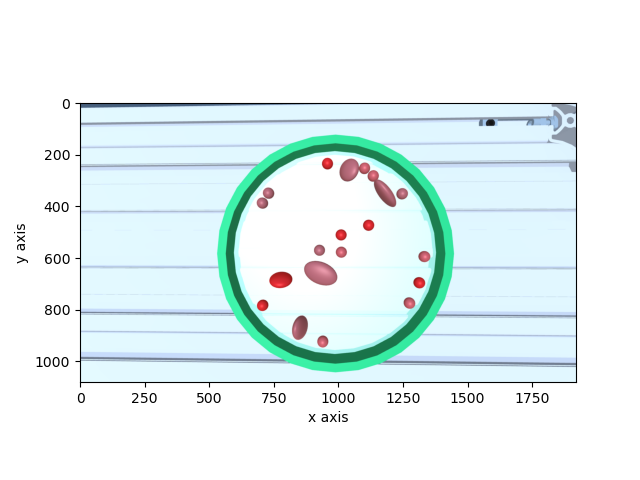

In [36]:
import matplotlib.pyplot as plt
%matplotlib notebook
import detObjFunc as RV
orImage=RV.loadImage("petriDish_test_6.png")
RV.showImage(orImage,"original image")

In [37]:
def findBacteria(iImage,draw=0):
    #set draw=1 to see intermediate debug steps
    minR=380
    maxR=500
    dishThickness=45
    import detObjFunc as RV
    import cv2
    import matplotlib.pyplot as plt
    import detObjFunc as RV
    from PIL import Image
    import numpy as np
    #grImage=cv2.cvtColor(iImage,cv2.COLOR_RGB2GRAY)
    drImage=np.float32(iImage[:,:,0:3]/255)
    drImage=cv2.cvtColor(drImage,cv2.COLOR_RGB2BGR)
    #get circle of petri dish
    grImage=cv2.GaussianBlur(cv2.cvtColor(iImage,cv2.COLOR_RGB2GRAY), (19,19),0 );
    #drImage=cv2.cvtColor(iImage,cv2.COLOR_RGB2RGB)
    foundVar=cv2.HoughCircles(grImage,cv2.HOUGH_GRADIENT,1,50,param1=100,param2=50,minRadius=minR,maxRadius=maxR)
    if foundVar is not None:
        foundVar=np.round(foundVar[0,:]).astype("int")
    if draw:
        print(foundVar)
        for (x,y,r) in foundVar:
            drImage=cv2.circle(drImage,(x,y),r,(0,0,255),round(dishThickness*1.75))
        drImage=cv2.cvtColor(drImage,cv2.COLOR_BGR2RGB)
        RV.showImage(drImage,"found petri dish")
    #remove everything outside the dish on the red channel
    tImage=cv2.cvtColor(iImage[:,:,0:3],cv2.COLOR_RGB2GRAY)
    tImage=cv2.GaussianBlur(iImage[:,:,0], (15,15),0 );
    for x in range(tImage.shape[1]):
        for y in range(tImage.shape[0]):
            if (((x-foundVar[0,0])**2)+((y-foundVar[0,1])**2)>((foundVar[0,2]-dishThickness)**2)):
                tImage[y,x]=0
    if draw:
        RV.showImage(tImage,"removed background and thresholded")
    #threshold and mask
    (t1,tmp1)=cv2.threshold(tImage,140,1,cv2.THRESH_BINARY)
    (t2,tmp2)=cv2.threshold(tImage,215,1,cv2.THRESH_BINARY)
    mask=255*np.multiply(tmp1,(np.ones_like(tmp2)-tmp2))
    if draw:
        RV.showImage(255*tmp1,"thr1")
        RV.showImage(255*(1-tmp2),"thr2")
        RV.showImage(mask,"mask")
    #erode and dilate
    kernel = np.ones((3,3),np.uint8)
    kernel[0,0] = 0.25
    kernel[0,2] = 0.25
    kernel[2,0] = 0.25
    kernel[2,2] = 0.25
    mask = cv2.erode(mask,kernel,iterations = 7)
    if draw:
        RV.showImage(mask,"eroded")
    mask = cv2.dilate(mask,kernel,iterations = 15)
    if draw:
        RV.showImage(mask,"dilated, end mask")
    #label individual objects
    ret, labelImage = cv2.connectedComponents(mask)
    if draw:
        print("ret= "+str(ret))
        #RV.showImage(((255/ret))*labelImage,"labels")
        #colour results
        colours=np.random.randint(0,253,(ret,3))
        colours[0,:]=np.zeros_like(colours[0,:])
        rImage=np.zeros_like(iImage)
        rImage=colours[labelImage,:]
        RV.showImage(rImage,"coloured results")
    #calculate average coordinate of each found object
    coord_data=np.zeros((ret,3))
    for x in range(labelImage.shape[1]):
        for y in range(labelImage.shape[0]):
            coord_data[labelImage[y,x],0]=coord_data[labelImage[y,x],0]+x
            coord_data[labelImage[y,x],1]=coord_data[labelImage[y,x],1]+y
            coord_data[labelImage[y,x],2]=coord_data[labelImage[y,x],2]+1
    avg_coords=np.zeros((ret,2),dtype="int")
    for i in range(ret):
        avg_coords[i,0]=round(coord_data[i,0]/coord_data[i,2])
        avg_coords[i,1]=round(coord_data[i,1]/coord_data[i,2])
    #print(avg_coords)
    avg_coords=np.delete(avg_coords,0,0)  #delete the background's row
    if draw:
        lastImage=np.float32(iImage[:,:,0:3]/255)
        lastImage=cv2.cvtColor(lastImage,cv2.COLOR_RGB2BGR)
        print(lastImage.shape)
        print(avg_coords)
        for j in range(ret-1):
            lastImage=cv2.line(lastImage,(avg_coords[j,0]+10,avg_coords[j,1]),(avg_coords[j,0]-10,avg_coords[j,1]),(0,255,127),2)
            lastImage=cv2.line(lastImage,(avg_coords[j,0],avg_coords[j,1]+10),(avg_coords[j,0],avg_coords[j,1]-10),(0,255,127),2)
        lastImage=cv2.cvtColor(lastImage,cv2.COLOR_BGR2RGB)
        RV.showImage(lastImage,"found coords")
    return avg_coords

[[988 584 423]]


<IPython.core.display.Javascript object>


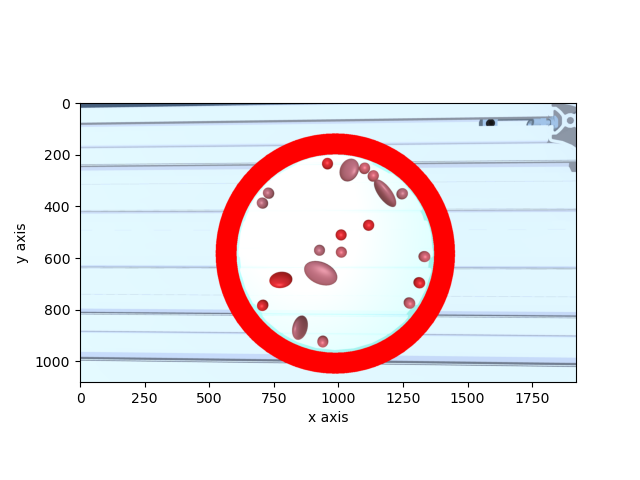

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<IPython.core.display.Javascript object>


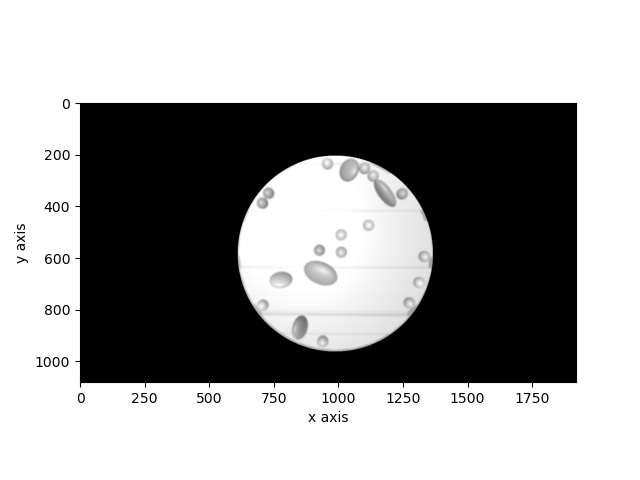

<IPython.core.display.Javascript object>


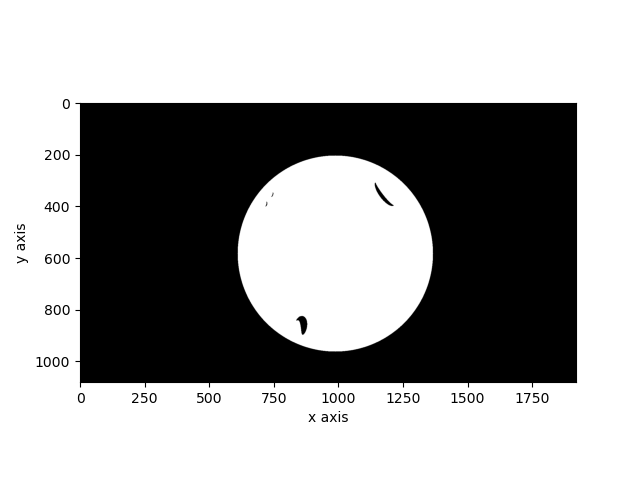

<IPython.core.display.Javascript object>


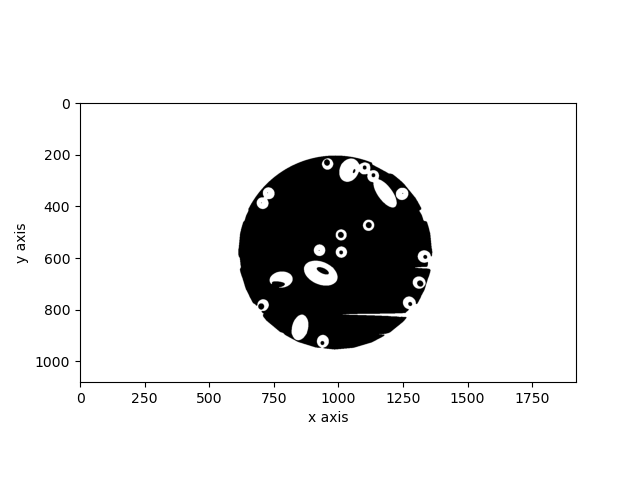

<IPython.core.display.Javascript object>


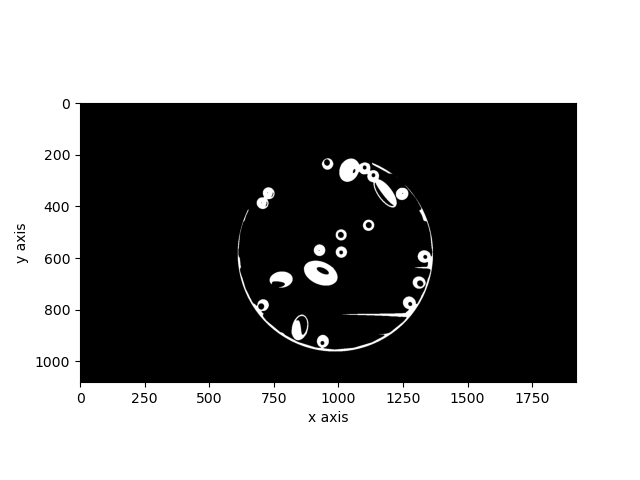

<IPython.core.display.Javascript object>


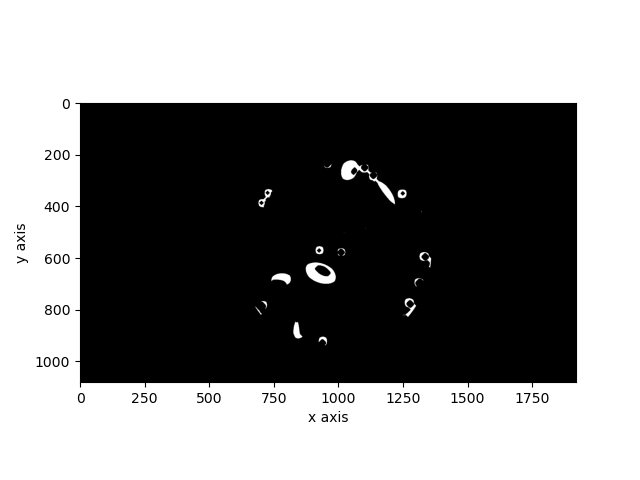

<IPython.core.display.Javascript object>


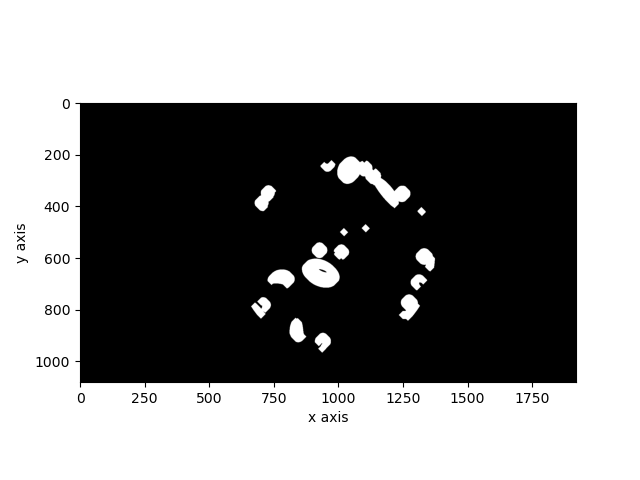

ret= 17


<IPython.core.display.Javascript object>


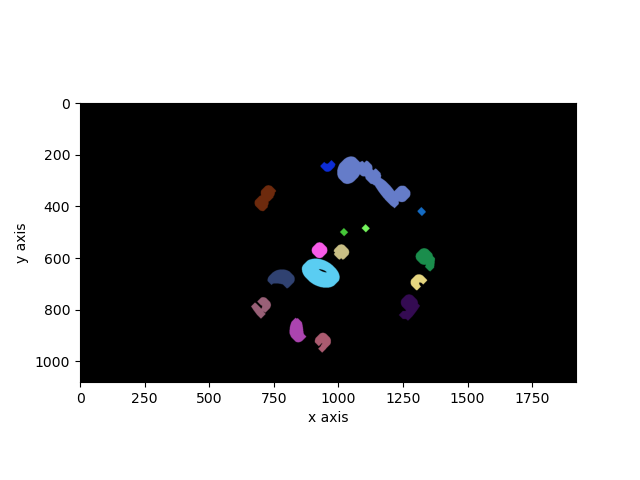

(1080, 1920, 3)
[[1127  300]
 [ 960  248]
 [ 716  369]
 [1322  422]
 [1106  486]
 [1022  502]
 [ 927  571]
 [1011  578]
 [1339  604]
 [ 931  660]
 [ 781  679]
 [1308  692]
 [1274  790]
 [ 703  791]
 [ 840  882]
 [ 940  924]]


<IPython.core.display.Javascript object>


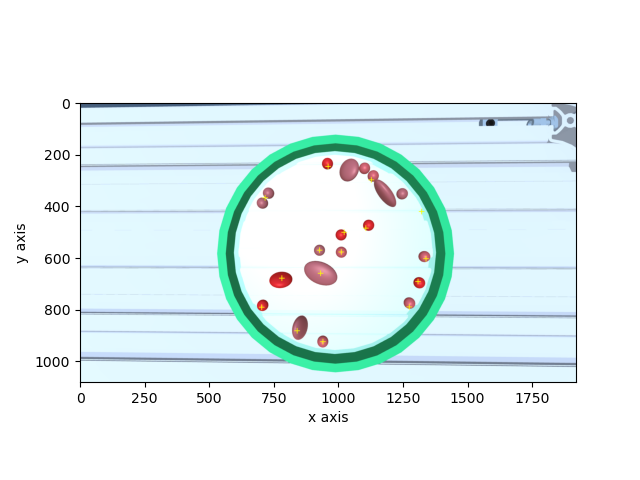

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[1127  300]
 [ 960  248]
 [ 716  369]
 [1322  422]
 [1106  486]
 [1022  502]
 [ 927  571]
 [1011  578]
 [1339  604]
 [ 931  660]
 [ 781  679]
 [1308  692]
 [1274  790]
 [ 703  791]
 [ 840  882]
 [ 940  924]]


In [38]:
print(findBacteria(orImage,1))